In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import SaltRemover

**Activity dataset for DNA Topoisomerase II alpha was retrieved from ChEMBL.**

In [2]:
df = pd.read_csv("dataset_activity.csv",sep=";")

In [3]:
df.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL575801,NaN,0,819.79,2,6.47,4,CN(CCNC(=O)CCCCC(=O)NCCN(C)CCn1nc2c3c(cccc31)C...,IC50,'=',...,DNA topoisomerase II alpha,Homo sapiens,SINGLE PROTEIN,CHEMBL1154053,1,Scientific Literature,Bioorg. Med. Chem.,2009.0,None,NaN
1,CHEMBL573581,NaN,0,380.84,0,4.14,8,CN(CCN=[N+]=[N-])CCn1nc2c3c(cccc31)C(=O)c1c(Cl...,IC50,'=',...,DNA topoisomerase II alpha,Homo sapiens,SINGLE PROTEIN,CHEMBL1154053,1,Scientific Literature,Bioorg. Med. Chem.,2009.0,None,NaN
2,CHEMBL4750575,NaN,0,458.52,1,5.33,E30,COc1ccc2[nH]c3c([N+](=O)[O-])ccc(Nc4ccc(CN5CCC...,Inhibition,NaN,...,DNA topoisomerase II alpha,Homo sapiens,SINGLE PROTEIN,CHEMBL4673288,1,Scientific Literature,Bioorg Med Chem,2021.0,None,Dose = 200.0 microM | TIME = 0.5 hr
3,CHEMBL4744119,NaN,0,407.38,0,4.06,E22,COc1cc(Nc2ccc([N+](=O)[O-])c3[nH]c4ccc(O)cc4c(...,Inhibition,NaN,...,DNA topoisomerase II alpha,Homo sapiens,SINGLE PROTEIN,CHEMBL4673288,1,Scientific Literature,Bioorg Med Chem,2021.0,None,Dose = 200.0 microM | TIME = 0.5 hr
4,CHEMBL4760194,NaN,0,407.38,0,4.06,E23,COc1ccc(Nc2ccc([N+](=O)[O-])c3[nH]c4ccc(O)cc4c...,Inhibition,NaN,...,DNA topoisomerase II alpha,Homo sapiens,SINGLE PROTEIN,CHEMBL4673288,1,Scientific Literature,Bioorg Med Chem,2021.0,None,Dose = 200.0 microM | TIME = 0.5 hr


In [4]:
df.shape

(5972, 45)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5972 entries, 0 to 5971
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Molecule ChEMBL ID          5972 non-null   object 
 1   Molecule Name               859 non-null    object 
 2   Molecule Max Phase          5972 non-null   int64  
 3   Molecular Weight            5972 non-null   object 
 4   #RO5 Violations             5972 non-null   object 
 5   AlogP                       5972 non-null   object 
 6   Compound Key                5972 non-null   object 
 7   Smiles                      5971 non-null   object 
 8   Standard Type               5972 non-null   object 
 9   Standard Relation           3544 non-null   object 
 10  Standard Value              3544 non-null   float64
 11  Standard Units              5032 non-null   object 
 12  pChEMBL Value               364 non-null    float64
 13  Data Validity Comment       320 n

In [6]:
df.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties'],
      dtype='object')

In [7]:
df = df[['Molecule ChEMBL ID','#RO5 Violations','Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units','Comment']]

In [8]:
df.head()

,Molecule ChEMBL ID,#RO5 Violations,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,Comment
0,CHEMBL575801,2,CN(CCNC(=O)CCCCC(=O)NCCN(C)CCn1nc2c3c(cccc31)C...,IC50,'=',48000.0,nM,NaN
1,CHEMBL573581,0,CN(CCN=[N+]=[N-])CCn1nc2c3c(cccc31)C(=O)c1c(Cl...,IC50,'=',25000.0,nM,NaN
2,CHEMBL4750575,1,COc1ccc2[nH]c3c([N+](=O)[O-])ccc(Nc4ccc(CN5CCC...,Inhibition,NaN,NaN,%,Active
3,CHEMBL4744119,0,COc1cc(Nc2ccc([N+](=O)[O-])c3[nH]c4ccc(O)cc4c(...,Inhibition,NaN,NaN,%,Active
4,CHEMBL4760194,0,COc1ccc(Nc2ccc([N+](=O)[O-])c3[nH]c4ccc(O)cc4c...,Inhibition,NaN,NaN,%,Not Active


In [9]:
df.shape

(5972, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5972 entries, 0 to 5971
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Molecule ChEMBL ID  5972 non-null   object 
 1   #RO5 Violations     5972 non-null   object 
 2   Smiles              5971 non-null   object 
 3   Standard Type       5972 non-null   object 
 4   Standard Relation   3544 non-null   object 
 5   Standard Value      3544 non-null   float64
 6   Standard Units      5032 non-null   object 
 7   Comment             2599 non-null   object 
dtypes: float64(1), object(7)
memory usage: 373.4+ KB


<AxesSubplot:xlabel='count', ylabel='Standard Type'>

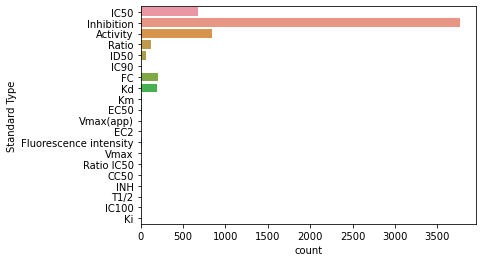

In [11]:
sns.countplot(y=df["Standard Type"])

In [12]:
df["Comment"].value_counts()

Active                   1176
Not Active                696
Not Determined            399
Inactive                  195
Dose-dependent effect     118
ND(Insoluble)               6
Not Evaluated               5
Uncertain                   2
Non-Toxic                   1
Toxic                       1
Name: Comment, dtype: int64

**In the paper, compounds were classified as active and inactive based on evidence from literature. So we will depend on "Comment" column and keep comppounds whiche are active and inactive.** 

In [13]:
df = df[(df["Comment"] == "Active") | (df["Comment"] == "Not Active") | (df["Comment"] == "Inactive") ]

In [14]:
df.head()

,Molecule ChEMBL ID,#RO5 Violations,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,Comment
2,CHEMBL4750575,1,COc1ccc2[nH]c3c([N+](=O)[O-])ccc(Nc4ccc(CN5CCC...,Inhibition,NaN,NaN,%,Active
3,CHEMBL4744119,0,COc1cc(Nc2ccc([N+](=O)[O-])c3[nH]c4ccc(O)cc4c(...,Inhibition,NaN,NaN,%,Active
4,CHEMBL4760194,0,COc1ccc(Nc2ccc([N+](=O)[O-])c3[nH]c4ccc(O)cc4c...,Inhibition,NaN,NaN,%,Not Active
8,CHEMBL3427565,1,Oc1ccc(-c2ccc(-c3ccc(O)c(O)c3)c(O)c2O)cc1O,Inhibition,NaN,NaN,%,Active
14,CHEMBL307856,0,COc1cc(-c2cc(=O)c3ccccc3o2)cc(OC)c1OC,Inhibition,NaN,NaN,%,Active


In [15]:
df.shape

(2067, 8)

In [16]:
df.replace(to_replace="Not Active",value="Inactive",inplace=True)

In [18]:
df.reset_index(drop=True,inplace=True)

In [19]:
df.head()

,Molecule ChEMBL ID,#RO5 Violations,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,Comment
0,CHEMBL4750575,1,COc1ccc2[nH]c3c([N+](=O)[O-])ccc(Nc4ccc(CN5CCC...,Inhibition,NaN,NaN,%,Active
1,CHEMBL4744119,0,COc1cc(Nc2ccc([N+](=O)[O-])c3[nH]c4ccc(O)cc4c(...,Inhibition,NaN,NaN,%,Active
2,CHEMBL4760194,0,COc1ccc(Nc2ccc([N+](=O)[O-])c3[nH]c4ccc(O)cc4c...,Inhibition,NaN,NaN,%,Inactive
3,CHEMBL3427565,1,Oc1ccc(-c2ccc(-c3ccc(O)c(O)c3)c(O)c2O)cc1O,Inhibition,NaN,NaN,%,Active
4,CHEMBL307856,0,COc1cc(-c2cc(=O)c3ccccc3o2)cc(OC)c1OC,Inhibition,NaN,NaN,%,Active


In [20]:
df["Molecule ChEMBL ID"].value_counts()

CHEMBL44657      110
CHEMBL43          17
CHEMBL1413199     12
CHEMBL1096926     12
CHEMBL1186087     10
                ... 
CHEMBL3600601      1
CHEMBL3991935      1
CHEMBL1090090      1
CHEMBL1950289      1
CHEMBL510912       1
Name: Molecule ChEMBL ID, Length: 1369, dtype: int64

In [21]:
df.drop_duplicates(keep="first",inplace=True)

In [22]:
df.shape

(1545, 8)

In [23]:
df.head()

,Molecule ChEMBL ID,#RO5 Violations,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,Comment
0,CHEMBL4750575,1,COc1ccc2[nH]c3c([N+](=O)[O-])ccc(Nc4ccc(CN5CCC...,Inhibition,NaN,NaN,%,Active
1,CHEMBL4744119,0,COc1cc(Nc2ccc([N+](=O)[O-])c3[nH]c4ccc(O)cc4c(...,Inhibition,NaN,NaN,%,Active
2,CHEMBL4760194,0,COc1ccc(Nc2ccc([N+](=O)[O-])c3[nH]c4ccc(O)cc4c...,Inhibition,NaN,NaN,%,Inactive
3,CHEMBL3427565,1,Oc1ccc(-c2ccc(-c3ccc(O)c(O)c3)c(O)c2O)cc1O,Inhibition,NaN,NaN,%,Active
4,CHEMBL307856,0,COc1cc(-c2cc(=O)c3ccccc3o2)cc(OC)c1OC,Inhibition,NaN,NaN,%,Active


In [24]:
df = df[["Molecule ChEMBL ID","#RO5 Violations","Smiles","Comment"]]

In [25]:
df.head()

,Molecule ChEMBL ID,#RO5 Violations,Smiles,Comment
0,CHEMBL4750575,1,COc1ccc2[nH]c3c([N+](=O)[O-])ccc(Nc4ccc(CN5CCC...,Active
1,CHEMBL4744119,0,COc1cc(Nc2ccc([N+](=O)[O-])c3[nH]c4ccc(O)cc4c(...,Active
2,CHEMBL4760194,0,COc1ccc(Nc2ccc([N+](=O)[O-])c3[nH]c4ccc(O)cc4c...,Inactive
3,CHEMBL3427565,1,Oc1ccc(-c2ccc(-c3ccc(O)c(O)c3)c(O)c2O)cc1O,Active
4,CHEMBL307856,0,COc1cc(-c2cc(=O)c3ccccc3o2)cc(OC)c1OC,Active


In [26]:
label = []
for i in df["Comment"]:
    if i == "Active":
        label.append("1")
    else:
        label.append("0")

In [27]:
df["label"] = label

/var/folders/ng/whnp3t611lq2k8dzf4hzhtnw0000gn/T/ipykernel_9351/919931213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = label


In [28]:
df.head()

,Molecule ChEMBL ID,#RO5 Violations,Smiles,Comment,label
0,CHEMBL4750575,1,COc1ccc2[nH]c3c([N+](=O)[O-])ccc(Nc4ccc(CN5CCC...,Active,1
1,CHEMBL4744119,0,COc1cc(Nc2ccc([N+](=O)[O-])c3[nH]c4ccc(O)cc4c(...,Active,1
2,CHEMBL4760194,0,COc1ccc(Nc2ccc([N+](=O)[O-])c3[nH]c4ccc(O)cc4c...,Inactive,0
3,CHEMBL3427565,1,Oc1ccc(-c2ccc(-c3ccc(O)c(O)c3)c(O)c2O)cc1O,Active,1
4,CHEMBL307856,0,COc1cc(-c2cc(=O)c3ccccc3o2)cc(OC)c1OC,Active,1


In [30]:
df.drop("Comment",axis=1,inplace=True)

/Users/sherifelsabbagh/opt/anaconda3/envs/my-rdkit-env/lib/python3.9/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
df.head()

,Molecule ChEMBL ID,#RO5 Violations,Smiles,label
0,CHEMBL4750575,1,COc1ccc2[nH]c3c([N+](=O)[O-])ccc(Nc4ccc(CN5CCC...,1
1,CHEMBL4744119,0,COc1cc(Nc2ccc([N+](=O)[O-])c3[nH]c4ccc(O)cc4c(...,1
2,CHEMBL4760194,0,COc1ccc(Nc2ccc([N+](=O)[O-])c3[nH]c4ccc(O)cc4c...,0
3,CHEMBL3427565,1,Oc1ccc(-c2ccc(-c3ccc(O)c(O)c3)c(O)c2O)cc1O,1
4,CHEMBL307856,0,COc1cc(-c2cc(=O)c3ccccc3o2)cc(OC)c1OC,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 2065
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Molecule ChEMBL ID  1545 non-null   object
 1   #RO5 Violations     1545 non-null   object
 2   Smiles              1544 non-null   object
 3   label               1545 non-null   object
dtypes: object(4)
memory usage: 100.4+ KB


In [33]:
#drop NaN

df.dropna(axis=0,inplace=True)

/var/folders/ng/whnp3t611lq2k8dzf4hzhtnw0000gn/T/ipykernel_9351/4108383294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0,inplace=True)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 0 to 2065
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Molecule ChEMBL ID  1544 non-null   object
 1   #RO5 Violations     1544 non-null   object
 2   Smiles              1544 non-null   object
 3   label               1544 non-null   object
dtypes: object(4)
memory usage: 60.3+ KB


### **Standardizing Smiles**

In [39]:
from molvs import Standardizer

In [42]:
s = Standardizer()
remover = SaltRemover.SaltRemover()

In [44]:
smiles =[]
for smi in df["Smiles"]:
    if smi is not None:
        mol = Chem.MolFromSmiles(smi)
        mol = s.standardize(mol)
        mol = remover(mol)
        mol = Chem.MolToSmiles(mol)
        smiles.append(mol)
        

In [45]:
df["smiles"] = smiles
df.drop("Smiles",axis=1,inplace=True)

In [46]:
df.head()

,Molecule ChEMBL ID,#RO5 Violations,label,smiles
0,CHEMBL4750575,1,1,COc1ccc2[nH]c3c([N+](=O)[O-])ccc(Nc4ccc(CN5CCC...
1,CHEMBL4744119,0,1,COc1cc(Nc2ccc([N+](=O)[O-])c3[nH]c4ccc(O)cc4c(...
2,CHEMBL4760194,0,0,COc1ccc(Nc2ccc([N+](=O)[O-])c3[nH]c4ccc(O)cc4c...
3,CHEMBL3427565,1,1,Oc1ccc(-c2ccc(-c3ccc(O)c(O)c3)c(O)c2O)cc1O
4,CHEMBL307856,0,1,COc1cc(-c2cc(=O)c3ccccc3o2)cc(OC)c1OC


In [47]:
df.to_csv("dataset_clean.csv",index=None,header=True)